In [1]:
import pandas as pd 
import numpy as np


In [2]:
df=pd.read_csv("./dataset/train.csv")


In [3]:
df.head(100)

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral
...,...,...
95,28791.mp3,anger
96,2371.mp3,joy
97,27069.mp3,joy
98,8014.mp3,joy


In [4]:
df["emotion"].value_counts()

neutral     2630
joy          967
surprise     640
anger        596
sadness      344
fear         328
disgust      311
Name: emotion, dtype: int64

C:\Users\ved17\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


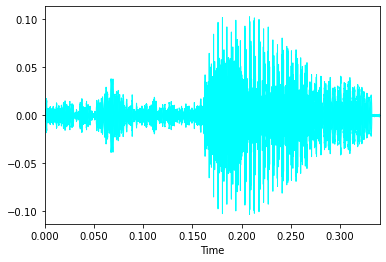

In [5]:

import librosa
import librosa.display
sample_num=2

#pick a file to display
#get the filename 
filename=df.filename[sample_num]
#define the beginning time of the signal
y,sr=librosa.load('dataset/TrainAudioFiles/'+str(filename)) #load the file
librosa.display.waveplot(y,sr=sr, x_axis='time', color='cyan')

In [6]:
import IPython.display as ipd
ipd.Audio('dataset/TrainAudioFiles/'+str(filename))

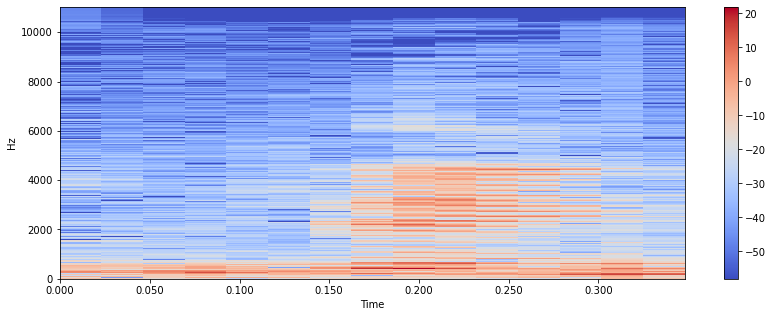

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [8]:
df.describe()

,filename,emotion
count,5816,5816
unique,5816,7
top,29063.mp3,neutral
freq,1,2630


(20, 15)


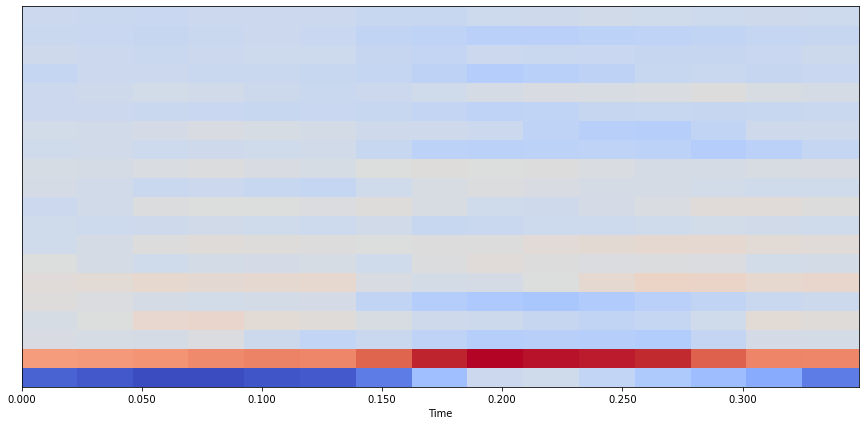

In [9]:
fs=10
mfccs = librosa.feature.mfcc(y, sr=fs)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [10]:
rmse = librosa.feature.rms(y=y)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)

In [11]:
mfcc


array([[-4.17785828e+02, -4.23450195e+02, -4.24617126e+02,
        -4.15576874e+02, -4.14506439e+02, -4.19058289e+02,
        -3.80372467e+02, -3.08286316e+02, -2.62816437e+02,
        -2.60122681e+02, -2.79712860e+02, -3.05410919e+02,
        -3.23646210e+02, -3.41246643e+02, -3.87281555e+02],
       [ 1.18222801e+02,  1.21844620e+02,  1.32491699e+02,
         1.42508453e+02,  1.28018967e+02,  1.14702606e+02,
         1.16332870e+02,  1.08307007e+02,  1.02544312e+02,
         9.90054016e+01,  9.75238037e+01,  9.92943268e+01,
         1.14034576e+02,  1.28827362e+02,  1.26638176e+02],
       [ 1.60694122e+01,  1.52159052e+01,  2.49547729e+01,
         2.39456787e+01,  1.61180058e+01,  1.36498032e+01,
        -2.14585609e+01, -4.87751808e+01, -5.51127701e+01,
        -5.39822845e+01, -4.87680130e+01, -3.36363068e+01,
        -6.03367567e+00,  1.33458433e+01,  1.29235020e+01],
       [ 4.27214966e+01,  4.12788925e+01,  4.65796928e+01,
         5.13239594e+01,  5.76867790e+01,  5.82584000

In [12]:
df

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral
...,...,...
5811,6688.mp3,neutral
5812,41901.wav,fear
5813,2066.mp3,neutral
5814,10825.mp3,surprise


In [13]:
audio_dataset_path='./dataset/TrainAudioFiles'

In [14]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [15]:

from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(audio_dataset_path,str(row["filename"]))
    final_class_labels=row["emotion"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]C:\Users\ved17\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
148it [01:22,  1.79it/s]


KeyboardInterrupt: 

In [16]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-283.32904, 126.99362, -36.856903, 43.745472,...",neutral
1,"[-291.48126, 85.95444, -31.580286, 28.471468, ...",neutral
2,"[-362.79108, 123.998245, -15.96158, 73.43797, ...",joy
3,"[-236.65076, 117.45328, -47.395912, 15.700452,...",neutral
4,"[-395.16562, 87.81874, -8.651618, 25.296888, -...",neutral


In [17]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [18]:

X.shape

(148, 40)

In [19]:
# y=np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y  = to_categorical(le.fit_transform(y))

In [20]:
y.shape

(148, 7)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train

array([[-3.35086304e+02,  1.00655945e+02,  1.15750322e+01, ...,
         4.97933358e-01, -9.28447723e-01, -2.21577138e-01],
       [-2.44470261e+02,  1.44882889e+02, -1.87322159e+01, ...,
        -2.93154645e+00, -4.22071981e+00, -2.76413345e+00],
       [-3.51046295e+02,  7.91976547e+01, -1.46302662e+01, ...,
        -2.73816490e+00, -2.45752549e+00, -2.06995273e+00],
       ...,
       [-4.05186554e+02,  9.99327164e+01, -3.03007965e+01, ...,
         7.68564224e-01, -1.37746060e+00, -4.28188705e+00],
       [-2.81657379e+02,  1.21125153e+02, -3.00808525e+01, ...,
         1.07207203e+00, -1.94373453e+00, -4.02039528e+00],
       [-3.96142792e+02,  1.33932205e+02,  5.92521095e+00, ...,
        -1.13504910e+00, -4.99346465e-01, -1.77273369e+00]], dtype=float32)

In [23]:

y_train

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
 

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [25]:
num_labels=y.shape[1]

In [26]:

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [28]:

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [29]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
4/4 [==============================] - 1s 60ms/step - loss: 58.7728 - accuracy: 0.1271 - val_loss: 14.7742 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 45.7954 - accuracy: 0.2458 - val_loss: 25.2225 - val_accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 34.4154 - accuracy: 0.2458 - val_loss: 27.2034 - val_accuracy: 0.3667
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 39.9847 - accuracy: 0.2373 - val_loss: 23.3994 - val_accuracy: 0.3667
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 27.8369 - accuracy: 0.3390 - val_loss: 18.3275 - val_accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 23.0415 - accuracy: 0.3051 - val_loss: 12.8090 - val_accuracy: 0.3667
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 20.1832 - accuracy: 0.2712 - val_loss: 8.8621 - val_accuracy: 0.3667
Epoch 8/

4/4 [==============================] - 0s 64ms/step - loss: 2.7379 - accuracy: 0.2373 - val_loss: 1.8910 - val_accuracy: 0.3667
Epoch 60/100
4/4 [==============================] - 0s 61ms/step - loss: 2.0461 - accuracy: 0.3305 - val_loss: 1.8892 - val_accuracy: 0.3667
Epoch 61/100
4/4 [==============================] - 0s 59ms/step - loss: 2.1488 - accuracy: 0.3305 - val_loss: 1.8886 - val_accuracy: 0.3667
Epoch 62/100
4/4 [==============================] - 0s 71ms/step - loss: 2.1004 - accuracy: 0.3559 - val_loss: 1.8871 - val_accuracy: 0.3667
Epoch 63/100
4/4 [==============================] - 0s 66ms/step - loss: 2.5240 - accuracy: 0.3051 - val_loss: 1.8857 - val_accuracy: 0.3667
Epoch 64/100
4/4 [==============================] - 0s 68ms/step - loss: 2.2890 - accuracy: 0.2966 - val_loss: 1.8829 - val_accuracy: 0.3667
Epoch 65/100
4/4 [==============================] - 0s 61ms/step - loss: 2.1650 - accuracy: 0.3559 - val_loss: 1.8799 - val_accuracy: 0.3667
Epoch 66/100
4/4 [========

In [30]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.36666667461395264


In [73]:
filename = 'dataset/TrainAudioFiles/'+str(filename)
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
pc= model.predict_classes(prediction_feature)
p_c = le.inverse_transform(pc)
p_c[0]

'neutral'

In [74]:
test_df= pd.read_csv("./dataset/test.csv")

In [76]:
test_features=[]
for index_num,row in tqdm(test_df.iterrows()):
    file_name = os.path.join("./dataset/TestAudioFiles",str(row["filename"]))
    data=features_extractor(file_name)
    data  = data.reshape(1,-1)
    test_features.append(data)

251it [01:11,  3.24it/s]C:\Users\ved17\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1764
  warnings.warn(
2492it [12:05,  3.43it/s]


In [77]:
predicted_classes = []
for test_feature in test_features:
    pc= model.predict_classes(prediction_feature)
    p_c = le.inverse_transform(pc)
    predicted_classes.append(p_c[0])


C:\Users\ved17\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [81]:
len(predicted_classes)

2492

In [82]:
pred_class_df = pd.DataFrame(predicted_classes)

In [83]:
pred_class_df

,0
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
2487,neutral
2488,neutral
2489,neutral
2490,neutral


In [84]:
pred_df = pd.concat([test_df, pred_class_df], axis=1)

In [86]:
pred_df.columns = ["filename","emotion"]
pred_df


,filename,emotion
0,26199.mp3,neutral
1,692.mp3,neutral
2,16821.mp3,neutral
3,1608.mp3,neutral
4,47947.wav,neutral
...,...,...
2487,16692.mp3,neutral
2488,29505.mp3,neutral
2489,5807.mp3,neutral
2490,43982.wav,neutral


In [88]:
pred_df.to_csv("pred_v1.csv",index=False)